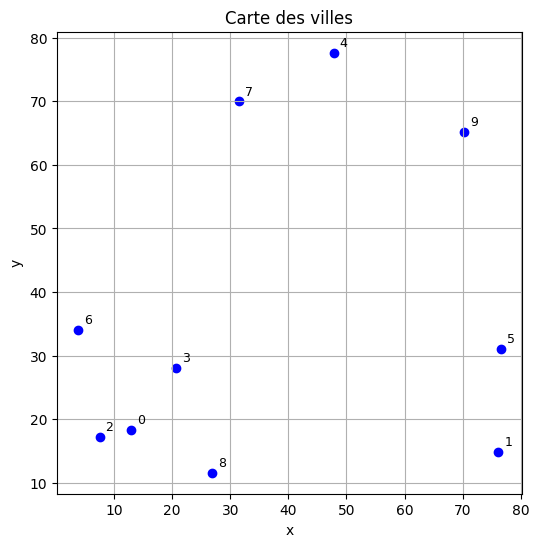

[0.0, 63.33846769570024, 5.500878920893665, 12.50364258313764, 68.8255376190371, 64.91857188787391, 18.24263633122267, 54.93977765234631, 15.471075323818583, 74.0557280549914]
[63.33846769570024, 0.0, 68.6764524690888, 57.06524775873023, 68.82765252065509, 16.187136389851382, 74.87861233447217, 70.89730042660972, 49.40711006272849, 50.62167397246358]
[5.500878920893665, 68.6764524690888, 0.0, 17.074113590945377, 72.61884946257283, 70.41943683977826, 17.298434769539945, 57.98837290874198, 20.133251981432487, 78.96424993494544]
[12.50364258313764, 57.06524775873023, 17.074113590945377, 0.0, 56.46113548717209, 55.99073942728746, 17.89037624539621, 43.25641359545729, 17.644677642083533, 61.90843308427382]
[68.8255376190371, 68.82765252065509, 72.61884946257283, 56.46113548717209, 0.0, 54.70004172389139, 61.91336751047253, 17.982106956664936, 69.25536689609557, 25.651774969714797]
[64.91857188787391, 16.187136389851382, 70.41943683977826, 55.99073942728746, 54.70004172389139, 0.0, 72.839731

In [2]:
# Import des fonctions utiles
from tsp_utils import generer_villes, afficher_villes, calculer_matrice_distances

# Génération de 10 villes aléatoires
villes = generer_villes(10)

# Affichage des villes sur un plan
afficher_villes(villes)

# Calcul de la matrice des distances euclidiennes
distances = calculer_matrice_distances(villes)

# Affichage de la matrice des distances
for row in distances:
    print(row)


In [3]:
from tsp_utils import generer_villes, calculer_matrice_distances, nearest_neighbor

for n in [10, 20, 50, 100]:
    print(f"\n--- Test avec {n} villes ---")
    villes = generer_villes(n)
    distances = calculer_matrice_distances(villes)
    chemin, total, temps = nearest_neighbor(villes, distances)

    print("Chemin trouvé :", chemin)
    print("Distance totale :", round(total, 2))
    print("Temps d'exécution :", round(temps, 4), "secondes")



--- Test avec 10 villes ---
Chemin trouvé : [0, 7, 9, 2, 6, 1, 3, 4, 5, 8, 0]
Distance totale : 324.53
Temps d'exécution : 0.0 secondes

--- Test avec 20 villes ---
Chemin trouvé : [0, 19, 14, 7, 17, 8, 5, 18, 13, 15, 9, 12, 2, 1, 6, 11, 4, 3, 16, 10, 0]
Distance totale : 370.61
Temps d'exécution : 0.0 secondes

--- Test avec 50 villes ---
Chemin trouvé : [0, 15, 45, 25, 47, 21, 22, 36, 5, 17, 46, 31, 35, 14, 41, 13, 39, 38, 3, 42, 34, 4, 30, 7, 11, 24, 18, 48, 44, 28, 33, 19, 9, 43, 26, 49, 6, 37, 8, 2, 40, 23, 20, 29, 16, 1, 32, 10, 12, 27, 0]
Distance totale : 678.34
Temps d'exécution : 0.0 secondes

--- Test avec 100 villes ---
Chemin trouvé : [0, 44, 3, 81, 98, 65, 23, 66, 83, 93, 25, 9, 1, 22, 19, 63, 41, 37, 68, 28, 10, 17, 55, 34, 43, 78, 94, 72, 46, 50, 11, 2, 75, 49, 96, 39, 32, 13, 36, 20, 53, 99, 45, 73, 8, 85, 54, 51, 64, 76, 40, 42, 15, 71, 69, 21, 52, 92, 47, 31, 84, 88, 61, 80, 56, 35, 30, 90, 16, 60, 5, 91, 82, 59, 29, 67, 97, 27, 77, 70, 95, 74, 18, 6, 57, 38, 12, 33

## Visualisation des solutions

Ci-desouss, les trajets obtenus avec les deux heuristiques implémentées sont affichés :
- En bleu : Plus proche voisin (Nearest Neighbor)
- En vert : Heuristique d’insertion

Les distances totales sont indiquées dans les titres des graphiques.

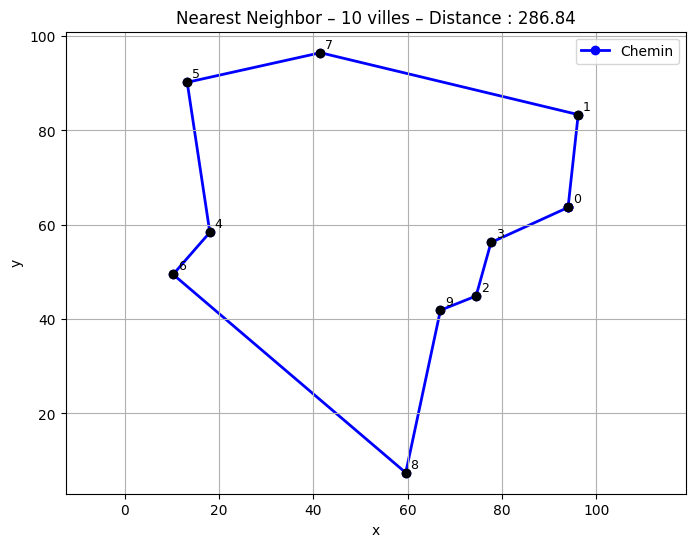

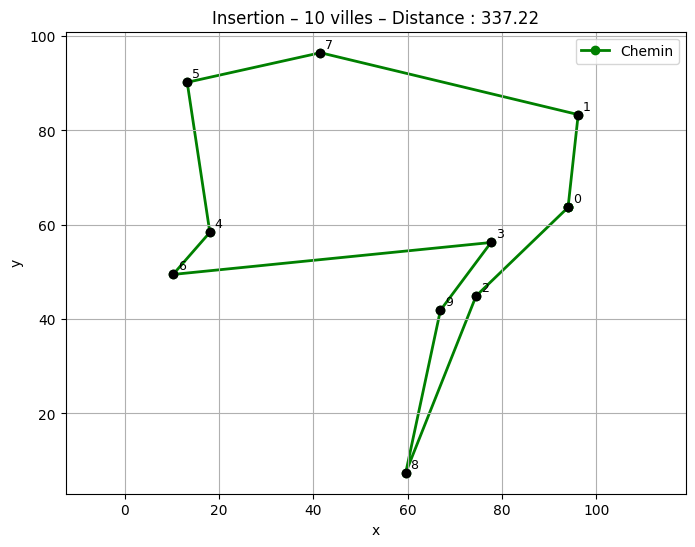

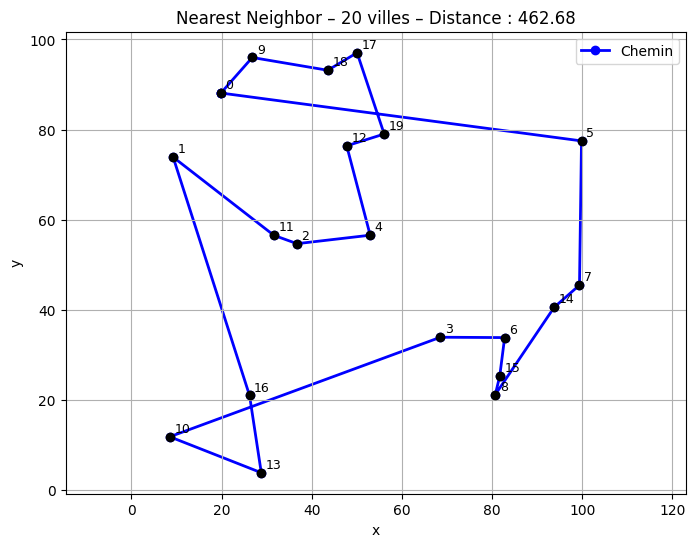

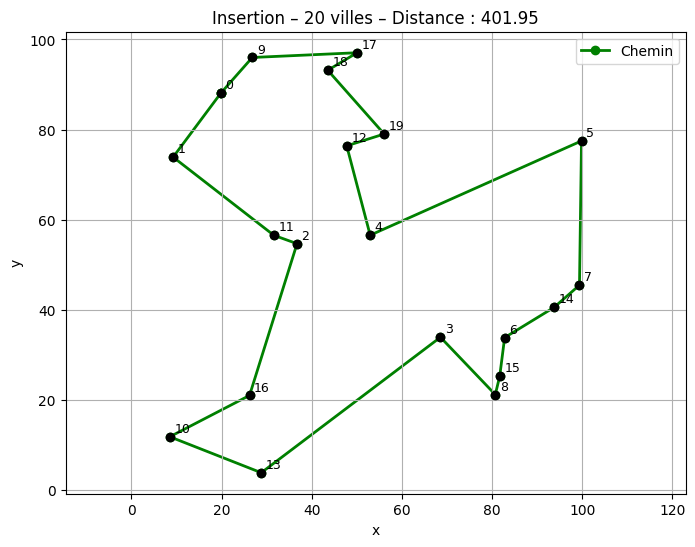

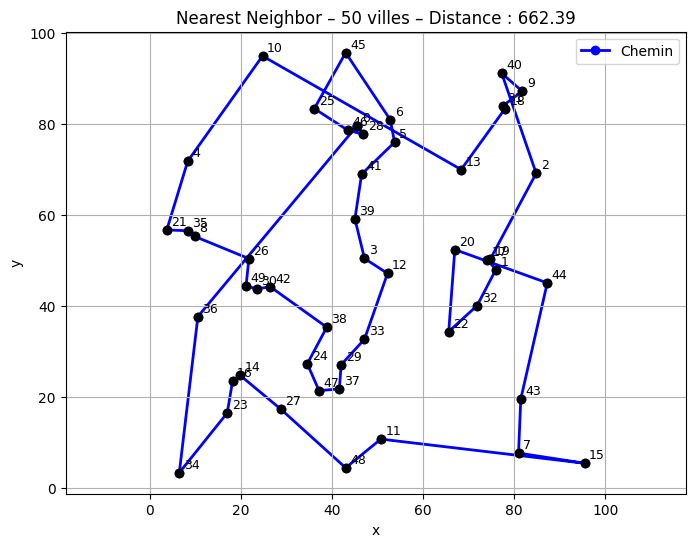

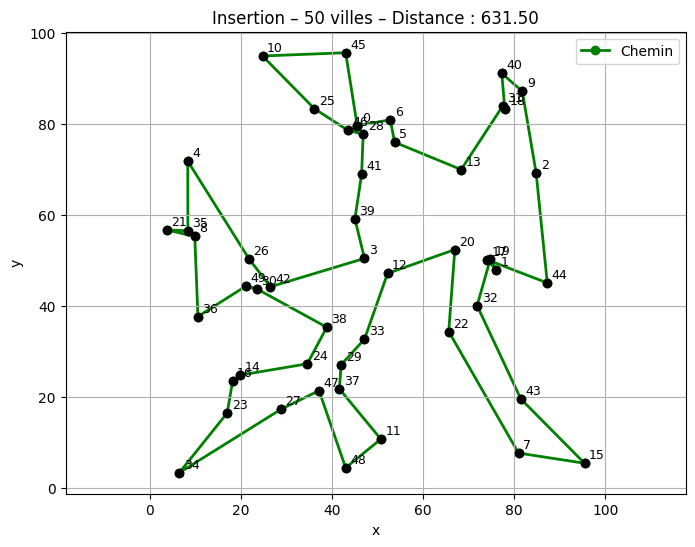

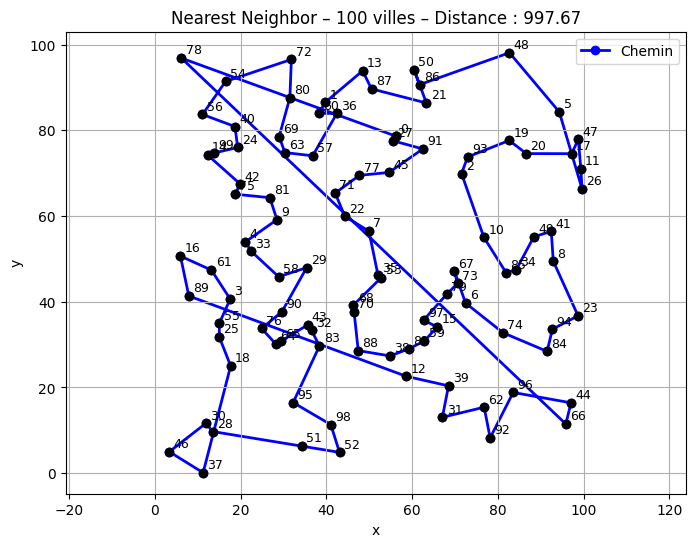

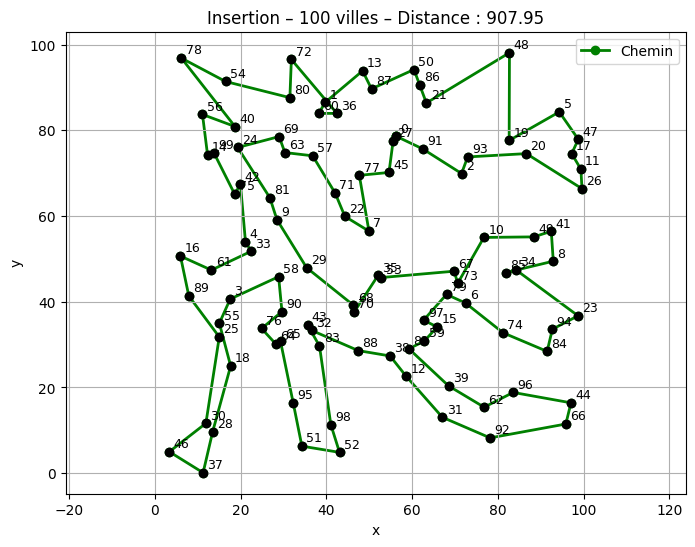

In [4]:
import importlib
import tsp_utils
importlib.reload(tsp_utils)
from tsp_utils import (
    generer_villes,
    calculer_matrice_distances,
    nearest_neighbor,
    insertion_heuristique,
    afficher_chemin
)

for n in [10, 20, 50, 100]:
    villes = generer_villes(n)
    distances = calculer_matrice_distances(villes)
    
    chemin_nn, dist_nn, _ = nearest_neighbor(villes, distances)
    afficher_chemin(villes, chemin_nn, titre=f"Nearest Neighbor – {n} villes", distance=dist_nn)
    
    chemin_ins, dist_ins, _ = insertion_heuristique(villes, distances)
    afficher_chemin(villes, chemin_ins, titre=f"Insertion – {n} villes", couleur="green", distance=dist_ins)

In [5]:
from tsp_utils import generer_villes, calculer_matrice_distances, nearest_neighbor, insertion_heuristique, mst_borne_inferieure

# Nombre de villes
n = 20

# Génération des données
villes = generer_villes(n)
distances = calculer_matrice_distances(villes)

# Calcul de la borne inférieure par MST
borne_mst = mst_borne_inferieure(distances)

# Heuristique : Nearest Neighbor
chemin_nn, dist_nn, t_nn = nearest_neighbor(villes, distances)
qualite_nn = 100 * borne_mst / dist_nn

# Heuristique : Insertion
chemin_ins, dist_ins, t_ins = insertion_heuristique(villes, distances)
qualite_ins = 100 * borne_mst / dist_ins

# Affichage
print(f"📏 Borne MST : {borne_mst:.2f}\n")

print("🔹 Nearest Neighbor")
print(f"  Distance : {dist_nn:.2f}")
print(f"  Temps : {t_nn:.4f} s")
print(f"  Qualité : {qualite_nn:.2f} %\n")

print("🔹 Insertion")
print(f"  Distance : {dist_ins:.2f}")
print(f"  Temps : {t_ins:.4f} s")
print(f"  Qualité : {qualite_ins:.2f} %")


📏 Borne MST : 283.64

🔹 Nearest Neighbor
  Distance : 365.22
  Temps : 0.0000 s
  Qualité : 77.66 %

🔹 Insertion
  Distance : 414.86
  Temps : 0.0000 s
  Qualité : 68.37 %


In [7]:
import pandas as pd

def tester_heuristiques_mst(tailles=[10, 20, 50, 100], nb_essais=3):
    resultats = []

    for n in tailles:
        for _ in range(nb_essais):
            villes = generer_villes(n)
            distances = calculer_matrice_distances(villes)
            borne_mst = mst_borne_inferieure(distances)

            # Nearest Neighbor
            chemin_nn, dist_nn, t_nn = nearest_neighbor(villes, distances)
            qualite_nn = 100 * borne_mst / dist_nn

            # Insertion
            chemin_ins, dist_ins, t_ins = insertion_heuristique(villes, distances)
            qualite_ins = 100 * borne_mst / dist_ins

            # Ajout des deux lignes au tableau
            resultats.append({
                "Taille": n,
                "Heuristique": "Nearest Neighbor",
                "Distance": dist_nn,
                "Temps (s)": t_nn,
                "Qualité (%)": qualite_nn
            })

            resultats.append({
                "Taille": n,
                "Heuristique": "Insertion",
                "Distance": dist_ins,
                "Temps (s)": t_ins,
                "Qualité (%)": qualite_ins
            })

    return pd.DataFrame(resultats)


In [8]:
df_resultats = tester_heuristiques_mst()
df_resultats


,Taille,Heuristique,Distance,Temps (s),Qualité (%)
0,10,Nearest Neighbor,320.091522,0.000000,70.089386
1,10,Insertion,308.868708,0.000000,72.636099
2,10,Nearest Neighbor,388.133575,0.000000,64.357734
3,10,Insertion,323.999494,0.000000,77.097026
4,10,Nearest Neighbor,353.083291,0.000000,60.366259
5,10,Insertion,315.490082,0.000978,67.559390
6,20,Nearest Neighbor,397.362990,0.000000,68.794019
7,20,Insertion,386.153900,0.000000,70.790938
8,20,Nearest Neighbor,454.517651,0.000000,62.841280
9,20,Insertion,390.791816,0.001076,73.088714
